## Global Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array  
from numpy.linalg import norm 

## Functions used in Problem 1 - Questions 4, 5, 6

In [27]:
def generate_phi(x, thetas_len):
    """
        Generates small phi matrix, containing a sample of the training set, raised to the appropriate powers,
        according to the theta vector we are using.
        Matrix size: (l+1)*1
    """
    
    # powers = [1,2,3...0]
    powers = np.concatenate([np.arange(1, thetas_len), np.array([0])])
    # Tiles x and the resulting vector's size is 1*(l+1).
    tiled_x = np.tile(x, thetas_len)

    return np.reshape(np.power(tiled_x, powers), (thetas_len,1))

In [28]:
def generate_big_phi(x, thetas_len, N):
    """
        Generates big phi matrix, containing all samples in training set, raised to the appropriate power. 
        Matrix size: N*(l+1), N: Training set size, l: Number of features in theta vector (theta_len)
    """
    
    # powers = [1,2,...thetas_len,0
    #              ...
    #          1,2,...thetas_len,0]    
    powers = np.tile(np.concatenate([np.arange(1, thetas_len), np.array([0])]), (N,1))
    
    # Tiles each value in x vector (thetas_len+1) times. The resulting matrix is size N*(l+1).
    tiled_x = np.tile(x, (1, powers.shape[1]))
    
    # Element-wise power of matrix tiled_x to powers matrix.
    return np.power(tiled_x, powers)

In [29]:
def calculate_y(x, thetas, N, noise_variance=-0.1):
    """
        Calculates vector y, containing the observations or predictions, using the relationship: y=big_phi*thetas
        Matrix size: (N,1)
        If we want to apply gaussian noise to generate synthetic observations, we pass a positive
            noise variance as the last argument of the function.
        
    """
    big_phi = generate_big_phi(x, len(thetas), N)
    
    y = np.matmul(big_phi, thetas)

    if noise_variance > 0:
        gaussian_noise = np.random.normal(0, np.sqrt(noise_variance), N).reshape((N,1))
        y_withnoise = y + gaussian_noise
        return y_withnoise
    else:
        return y

In [30]:
def calculate_m_th_given_y(theta_0, theta, theta_variance, noise_variance, N_train):
    """
        Calculates μ_θ|y using the formulas in Bayesian Linear Regression-Gaussian.pdf
    """
    
    x_train = np.linspace(0, 2, num=N_train).reshape((N_train, 1))
    y_train = calculate_y(x_train, theta_0, N_train, noise_variance)
    big_phi = generate_big_phi(x_train, len(theta), N_train)    

    eye = np.eye(len(theta))
    
    x1 = 1/theta_variance * eye + 1/noise_variance * np.matmul(big_phi.transpose(), big_phi)
    x1_inv = np.linalg.inv(x1)

    x2 = np.matmul(big_phi.transpose(), y_train - np.matmul(big_phi, theta))
    x3 = 1/noise_variance * np.matmul(x1_inv, x2)

    m_th_given_y = theta + x3
    
    return m_th_given_y, big_phi  

In [31]:
def calculate_means_variances(x_test, m_th_given_y, big_phi, theta_variance, noise_variance, thetas_len):
    """
        Calculates means and variances for each sample in the test set using the formulas 
            in Bayesian Linear Regression-Gaussian.pdf
    """
    
    means = np.zeros((len(x_test), 1))
    variances = np.zeros((len(x_test), 1))
    eye = np.eye(thetas_len)

    for i in range(N_test):
        phi = generate_phi(x_test[i], thetas_len)
        means[i] = np.matmul(phi.transpose(), m_th_given_y)
        
        x1 = noise_variance * eye + theta_variance * np.matmul(big_phi.transpose(), big_phi)
        x1_inv = np.linalg.inv(x1)
        x2 = np.matmul(phi.transpose(), x1_inv)
        variances[i] = noise_variance + noise_variance * theta_variance * np.matmul(x2, phi)
        
    return means, variances

## Problem 1 - Questions 4, 5

For Questions 4,5, we encoded our prior knowledge for the unknown parameter vector to a Gaussian having a mean vector $\theta_0$ (different for each question) and covariance matrix $\Sigma_\theta=\sigma_\theta^2I$. We performed full Bayesian inference using the formulas in "Bayesian Linear Regression-Gaussian.pdf" in e-class to evaluate the y value for 20 randomly selected points in [0,2], using $N_{train}$ points for the calculation.

We used different combinations of the variance of the prior knowledge of theta $\sigma_\theta^2$, the noise variance $\sigma_\eta^2$, our estimation of the parameter vector $\theta_0$ and the number of training points $N_{train}$ which can be summarized as:

- Question 4 : Parameter vector $\theta_0$ equal to the true theta vector $\theta_{true}$ used in the other questions, $\sigma_\theta^2=0.1$, $N_{train}=20$. We examined:
    - $\sigma_\eta^2=0.05$
    - $\sigma_\eta^2=0.15$
- Question 5 : Parameter vector $\theta_0$ not equal to the true theta vector $\theta_{true}$, $\sigma_\eta^2=0.05$. We examined:
    - $\sigma_\theta^2=0.1$, $N_{train}=20$
    - $\sigma_\theta^2=0.1$, $N_{train}=500$
    - $\sigma_\theta^2=2$, $N_{train}=20$
    - $\sigma_\theta^2=2$, $N_{train}=500$

## Problem 1 - Question 4

In [32]:
# Parameters

# True theta : theta1, theta2, ..., theta5, theta0
theta_true = np.array([-1, 0.9, 0.7, 0, -0.2, 0.2]).reshape((6,1))

# N_train_1 : Question 4
N_train_1 = 20
N_test = 20

#Prior knowledge:  theta_1 : Question 4
theta_0 = theta_true

#Theta variance:  theta_variance_1 : Question 4
theta_variance_1 = 0.1

#Noise variance:  noise_variance_1 : Question 4a, noise_variance_2 : Question 4b
noise_variance_1 = 0.05
noise_variance_2 = 0.15

In [33]:
# Combinations of variances for Question 4.
combinations_1 = [(theta_variance_1, noise_variance_1),
               (theta_variance_1, noise_variance_2)]

means_collection_1 = []
variances_collection_1 = []

In [34]:
# Test vector and true vector (only used for plotting).
x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1))

x_true = np.linspace(0, 2, num=1000).reshape((1000, 1))
y_true = calculate_y(x_true, theta_true, 1000)

In [35]:
# Bayesian inference on a train set.
# Appending results to vectors which will collect the means and variances from the 4 experiments.
for index, comb in enumerate(combinations_1):    
    
    m_th_given_y, big_phi = calculate_m_th_given_y(theta_true, theta_0, comb[0], comb[1], N_train_1)
    means, variances = calculate_means_variances(x_test, m_th_given_y, big_phi, comb[0], comb[1], len(theta_0))

    means_collection_1.append(means)
    variances_collection_1.append(variances)

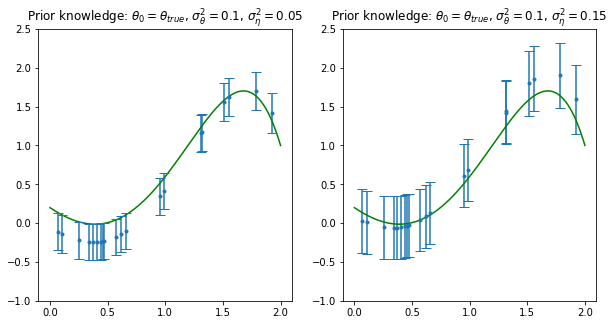

In [36]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

custom_ylim = (-1, 2.5)
plt.setp(axs, ylim=custom_ylim)

for index in range(len(means_collection_1)):
    axs[index].plot(x_true, y_true, c='green')

    axs[index].errorbar(x_test, 
                        means_collection_1[index], 
                        yerr=np.squeeze(np.sqrt(variances_collection_1[index])), 
                        fmt='.', capsize=5)


axs[0].title.set_text(r'Prior knowledge: $\theta_0=\theta_{true}$, $\sigma^2_\theta=0.1$, $\sigma^2_\eta=0.05$')
axs[1].title.set_text(r'Prior knowledge: $\theta_0=\theta_{true}$, $\sigma^2_\theta=0.1$, $\sigma^2_\eta=0.15$')

## Comments

Here, the hunch we have for theta is a very good one, in fact it is 100% accurate. That leads to a good fit of the resulting curves, even though the number of training points is small. If we increase the noise variance in the train data (Second plot), the error bars become larger, showing the growing uncertainty of the model's prediction of the y values.


## Problem 1 - Question 5

In [37]:
# Parameters

# True theta : theta1, theta2, ..., theta5, theta0
theta_true = np.array([-1, 0.9, 0.7, 0, -0.2, 0.2]).reshape((6,1))

# N_train_1 : Question 5a, N_train_2 : Question 5b
N_train_1 = 20
N_train_2 = 500
N_test = 20

#Prior knowledge:  
theta_0 = np.array([0.465, 0.0087, -0.093, -0.004, -10.54]).reshape((5,1))

#Theta variance:  theta_variance_1 : Question 5a, theta_variance_2 : Question 5b 
theta_variance_1 = 0.1
theta_variance_2 = 2

#Noise variance:  noise_variance_1 : Question 5
noise_variance_1 = 0.05

In [38]:
# Combinations of train points and theta variances for Question 5.
combinations_2 = [(N_train_1, theta_variance_1),
               (N_train_1, theta_variance_2),
               (N_train_2, theta_variance_1),
               (N_train_2, theta_variance_2)]

means_collection_2 = []
variances_collection_2 = []

In [39]:
# Test vector and true vector (only used for plotting).
x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1))

x_true = np.linspace(0, 2, num=1000).reshape((1000, 1))
y_true = calculate_y(x_true, theta_true, 1000)

In [40]:
# Bayesian inference on a train set.
# Appending results to vectors which will collect the means and variances from the 4 experiments.
for index, comb in enumerate(combinations_2):
    
    m_th_given_y, big_phi = calculate_m_th_given_y(theta_true, theta_0, comb[1], noise_variance_1, comb[0])
    means, variances = calculate_means_variances(x_test, m_th_given_y, big_phi, comb[1], noise_variance_1, len(theta_0))

    means_collection_2.append(means)
    variances_collection_2.append(variances)

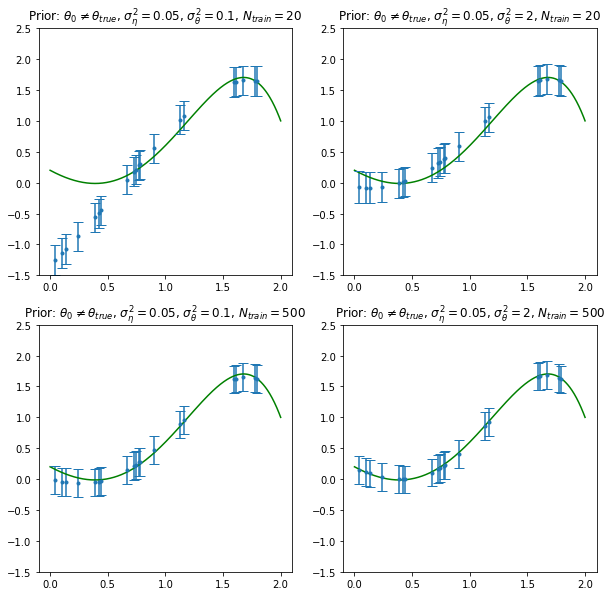

In [41]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

custom_ylim = (-1.5, 2.5)
plt.setp(axs, ylim=custom_ylim)

for index in range(len(means_collection_2)):
    axs[index//2, index%2].plot(x_true, y_true, c='green')

    axs[index//2, index%2].errorbar(x_test, 
                                    means_collection_2[index], 
                                    yerr=np.squeeze(np.sqrt(variances_collection_2[index])), 
                                    fmt='.', capsize=5)


axs[0, 0].title.set_text(r'Prior: $\theta_0\neq \theta_{true}$, $\sigma^2_\eta=0.05$, $\sigma^2_\theta=0.1$, $N_{train}=20$')
axs[0, 1].title.set_text(r'Prior: $\theta_0\neq \theta_{true}$, $\sigma^2_\eta=0.05$, $\sigma^2_\theta=2$, $N_{train}=20$')
axs[1, 0].title.set_text(r'Prior: $\theta_0\neq \theta_{true}$, $\sigma^2_\eta=0.05$, $\sigma^2_\theta=0.1$, $N_{train}=500$')
axs[1, 1].title.set_text(r'Prior: $\theta_0\neq \theta_{true}$, $\sigma^2_\eta=0.05$, $\sigma^2_\theta=2$, $N_{train}=500$')

## Comments

In this case, we don't have a good hunch about theta as we had previously. 

* For a small number of training points ($N_{train}=20$) and not allowing a large enough variance around the prior knowledge, the model fails to fit in a satisfactory amount the true curve (First plot). Due to the small number of training points, the only useful information is the a-priori estimation of theta which is not close to the true value. By increasing the theta variance to 2, we get better results as the model is allowed to move more from the prior knowledge of theta to a position closer to the true theta (Second plot). The fit obtained is a better one than the first case, but not perfect.

* For a large training set ($N_{train}=500$), its distribution is the dominant factor and overcomes the wrong a-priori information we have. The training set is large enough that no other information is needed to provide a good fit of the true curve (we practically end up with an ML estimator). That it true for either small (Third plot) or large variance of theta (Fourth plot) and we can clearly see that the large variance of the theta estimation doesn't play a big part in improving the results.

## Functions used in Problem 1 - Question 6

In [42]:
def calculate_m_s_th_given_y(alpha, beta, big_phi, y, thetas_len):
    """
        Calculates mean vector μ_θ|y and covariance matrix Σ_θ|y at iteration j.
    """
    eye = np.eye(thetas_len)
    x1 = alpha * eye + beta * np.matmul(big_phi.transpose(), big_phi)
    s = np.linalg.inv(x1)
    
    x2 = np.matmul(s, big_phi.transpose())
    m = beta * np.matmul(x2, y)
    
    return m, s  

In [43]:
def calculate_A_B(alpha, beta, big_phi, y, thetas_len):
    """
        Calculates A and B at iteration j.
    """
    
    m, s = calculate_m_s_th_given_y(alpha, beta, big_phi, y, thetas_len)
    A = pow(norm(m,2),2) + s.trace()

    x1 = np.matmul(big_phi, m) 
    x2 = y - x1
    x3 = np.matmul(big_phi, s)
    x4 = np.matmul(x3, big_phi.transpose())
    B = pow(norm(x2,2),2) + x4.trace()
    
    return A,B  

In [44]:
def implement_E_M(alpha, beta, big_phi, y, N_train, thetas_len, threshold):
    """
        Implementation of Expectation Maximization method. 
        The values a_j and b_j are initialized to a and b respectively and the calculations
            are performed while the correspoding differences are larger than a given threshold.
    """

    s_n = []
    num_it = []
    a_j = alpha
    b_j = beta
    num_it.append(0)
    s_n.append(1 / b_j)
    A, B = calculate_A_B(a_j, b_j, big_phi, y, thetas_len)
    a_jp1 = (big_phi.ndim) / A
    b_jp1 = N_train / B
    j = 1
    num_it.append(j)
    s_n.append(1 / b_jp1)
    print(f"Iter: {j}, a_j={a_j:.6f}, a_(j+1)={a_jp1:.6f}, b_j={b_j:.6f}, b_(j+1)={b_jp1:.6f}")

    while (abs(a_jp1 - a_j) > threshold) and (abs(b_jp1 - b_j) > threshold):
        A, B = calculate_A_B(a_jp1, b_jp1, big_phi, y, thetas_len)
        a_j = a_jp1
        a_jp1 = (big_phi.ndim) / A
        b_j = b_jp1
        b_jp1 = N_train / B
        j += 1
        num_it.append(j)
        s_n.append(1 / b_jp1)
        print(f"Iter: {j}, a_j={a_j:.6f}, a_(j+1)={a_jp1:.6f}, b_j={b_j:.6f}, b_(j+1)={b_jp1:.6f}")

    return a_jp1, b_jp1, num_it, s_n 

## Problem 1 - Question 6

We consider $N_{train} = 500$ equidistant points in the interval [0,2] which will be our x_train, and we feed them to our true model (using $\sigma_\eta^2$ = 0.05) in order to get our y_train, and so we have constructed a training set.
Given only this training set, the only random variable we can directly observe is y. Random variable $\vec{\theta}$ can't be directly observed, and so we call it a latent variable. We don't know $\vec{\theta}$, but we will use as prior knowledge that $\vec{\theta_0} = 0$ (even if we really know that it is not a good estimate).  We will also consider that $\vec{\theta}$ has the same dimensionality with the parameter vector of our true model).
So, given the above, from the full Bayesian inference we can derive estimates:

$μ_{θ|y} = bΣ_{θ|y}Φ^{T}Y$, $Σ_{θ|y} = (aI + bΦ^{Τ}Φ)^{-1}$ and we have also defined the variables $a=\frac{1}{\sigma_\theta^2}$ and $b=\frac{1}{\sigma_\eta^2}$. 

We can easily observe that we cant have our estimates, unless we know the values of $a$ and $b$.

For this, we will employ the EM algorithm which is a tool we use to maximize the likelihood function for problems with latent variables. It is an iterative process, during which we begin by initializing a and b with some arbitrary positive values  $a^{(0)}$ and $b^{(0)}$, and the algorithm goes on until it converges to some values $a^{(n)}$ and $b^{(n)}$.





In [45]:
# Parameters
N_train = 500
noise_variance = 0.05
thetas = np.array([-1, 0.9, 0.7, 0, -0.2, 0.2]).reshape((6,1))
threshold = 0.0095

# Train vectors
x_train = np.linspace(0, 2, num=N_train).reshape((N_train, 1))
big_phi = generate_big_phi(x_train, len(thetas), N_train) 
y_train = calculate_y(x_train, thetas, N_train, noise_variance)

In [46]:
# Run EM method.
a_0 = 1.0
b_0 = 1.0

a, b, num_it, s_n = implement_E_M(a_0, b_0, big_phi, y_train, N_train, len(thetas), threshold)
print(f"Final values: a={a:.6}, b={b:.6}")
print(f"From E-M algorithm: theta variance={1/a:.6}, noise variance={1/b:.6}")

Iter: 1, a_j=1.000000, a_(j+1)=0.733339, b_j=1.000000, b_(j+1)=17.260133
Iter: 2, a_j=0.733339, a_(j+1)=0.485210, b_j=17.260133, b_(j+1)=20.283481
Iter: 3, a_j=0.485210, a_(j+1)=0.402795, b_j=20.283481, b_(j+1)=20.323842
Iter: 4, a_j=0.402795, a_(j+1)=0.370767, b_j=20.323842, b_(j+1)=20.325199
Final values: a=0.370767, b=20.3252
From E-M algorithm: theta variance=2.69712, noise variance=0.0492


## Comments
We observe that the value we obtained for $\sigma_\eta^2$ is very close to the value of the noise variance 0.05 we used on our true model.

Text(0, 0.5, '$\\sigma_\\eta^2$')

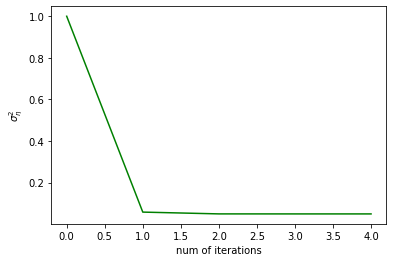

In [47]:
fig = plt.figure()
plt.plot(num_it, s_n, c = "green")

plt.xlabel('num of iterations')
plt.ylabel('$\sigma_\eta^2$')

With those optimal values for $σ^{-2}_{θ}$ and $σ^{-2}_{η}$ we obtained from EM, we perform predictions of the output variables y’s and their errors over a test set of 20 points we randomly select in the interval [0,2], using:


$μ_{y} = φ^{Τ}(x)μ_{θ|y}%$

$σ^{2}_{y} = σ^{2}_{η} + σ^{2}_{η}σ^{2}_{θ}φ^{Τ}(x)(σ^{2}_{η}Ι + σ^{2}_{θ}Φ^{Τ}Φ)^{-1}φ^{Τ}(x)$

In [48]:
# Test vector for making predictions using the values recovered from EM algorithm.
N_test = 20
x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1))

# Vectors used to plot true curve.
x_true = np.linspace(0, 2, num=1000).reshape((1000, 1))
y_true = calculate_y(x_true, thetas, 1000)

In [49]:
# Calculate means and variances on test set.
m_th_given_y, s = calculate_m_s_th_given_y(a, b, big_phi, y_train, len(thetas))
means, variances = calculate_means_variances(x_test, m_th_given_y, big_phi, 1/a, 1/b, len(thetas))

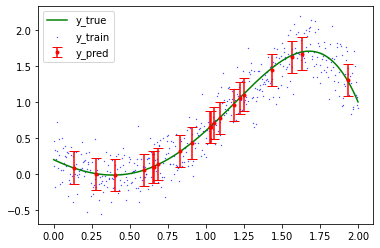

In [50]:
# Plot train points, predicted points on test set and true curve.
fig = plt.figure()
plt.scatter(x_train, y_train, s=0.1, c="blue", label="y_train")
plt.errorbar(x_test, means, yerr=np.sqrt(np.squeeze(variances)), c='red', fmt='.', capsize=5, label="y_pred")
plt.plot(x_true, y_true, c='green', label="y_true")
plt.legend(loc="upper left")

##Comment
From the graph, we can observe that our predictions for y's are very close to the corresponding values we take from our true model.